Dataset Loaded. First 5 rows:
    Gender Married Dependents     Education Self_Employed  ApplicantIncome  \
0    Male     Yes          1      Graduate           Yes             2026   
1  Female     Yes          2  Not Graduate            No             4724   
2    Male     Yes          0  Not Graduate            No            16569   
3    Male      No          0      Graduate            No            13036   
4    Male     Yes          0      Graduate            No            15047   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0               3610         679               120               1   
1               4255          68               240               1   
2              14484          72               180               1   
3              11015         462               360               1   
4               7397          79               360               0   

  Property_Area Loan_Status  
0         Rural           Y  
1     Semiurban          

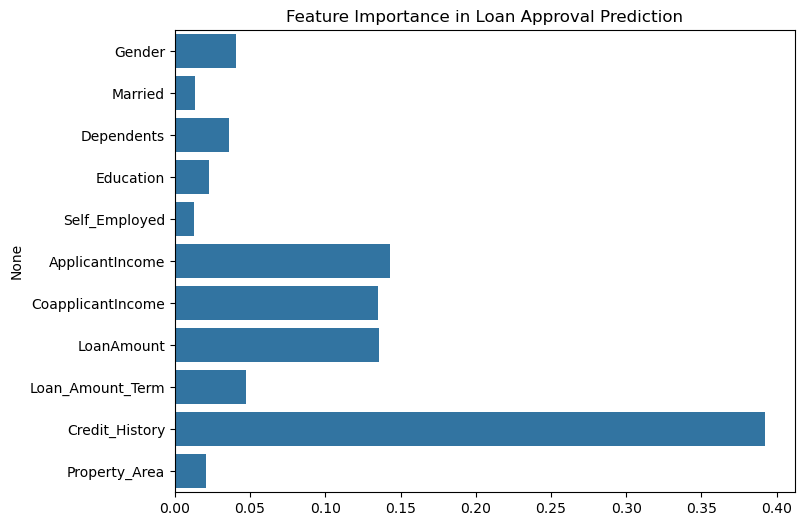

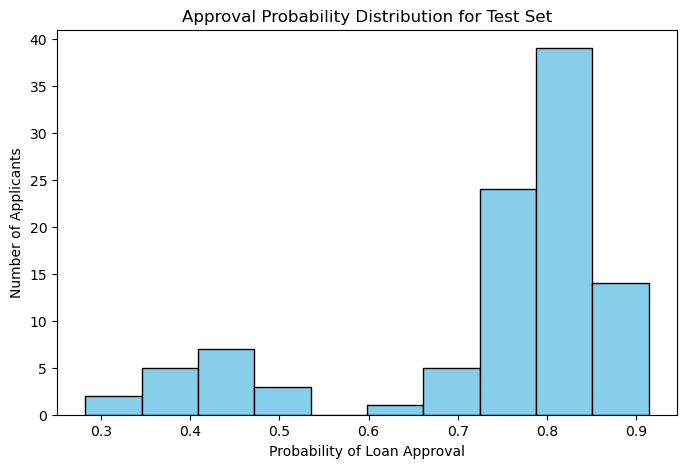

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Actual_Status,Predicted_Status,Approval_Probability
361,1,1,1,1,0,15551,12686,205,360,1,1,Y,Y,0.774845
73,0,0,2,1,0,5411,10699,104,360,1,1,Y,Y,0.732971
374,1,0,2,1,0,10406,10759,582,120,1,2,Y,Y,0.912182
155,0,1,0,0,0,14265,536,269,120,1,2,Y,Y,0.838895
104,0,1,1,1,0,18190,560,247,240,1,1,Y,Y,0.798749
394,1,0,0,0,1,13708,1827,599,180,1,0,Y,Y,0.847779
377,1,0,0,1,0,14111,9765,678,120,1,2,Y,Y,0.783161
124,1,1,1,1,0,18042,6721,612,180,1,1,Y,Y,0.884983
68,0,1,0,0,0,19940,9958,565,120,1,0,Y,Y,0.845097
450,0,1,3,1,1,11154,5341,518,240,1,2,Y,Y,0.814270



✅ Test set predictions saved as 'test_set_predictions.csv'

New Applicant Prediction: Y
Approval Probability: 82.35%

✅ Model and encoders saved successfully


In [10]:
# ===============================
# Loan Approval Prediction - Corrected & Enhanced Notebook
# ===============================

# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import joblib

# Step 2: Load Dataset
df = pd.read_csv('loan_data.csv')
print("Dataset Loaded. First 5 rows:\n", df.head())

# Step 3: Encode Categorical Variables (Separate LabelEncoders)
categorical_cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']
encoders = {}  # Dictionary to store encoders

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoders[col] = le

# Encode target separately
target_encoder = LabelEncoder()
df['Loan_Status'] = target_encoder.fit_transform(df['Loan_Status'])

# Step 4: Split Features and Target
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Hyperparameter Tuning using GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2', None]  # Fixed 'auto'
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    scoring='accuracy',
    verbose=1
)
grid_search.fit(X_train, y_train)

# Step 6: Train Model with Best Parameters
best_rf = grid_search.best_estimator_
best_rf.fit(X_train, y_train)

# Step 7: Cross-Validation Score
cv_score = cross_val_score(best_rf, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy Scores:", cv_score)
print("Mean CV Accuracy:", cv_score.mean())

# Step 8: Predictions on Test Data
y_pred = best_rf.predict(X_test)
y_prob = best_rf.predict_proba(X_test)[:,1]  # Probability of approval

# Step 9: Evaluate Model
print("\nTest Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Step 10: Feature Importance
importances = best_rf.feature_importances_
features = X.columns
plt.figure(figsize=(8,6))
sns.barplot(x=importances, y=features)
plt.title("Feature Importance in Loan Approval Prediction")
plt.show()

# Step 11: Probability Distribution
plt.figure(figsize=(8,5))
plt.hist(y_prob, bins=10, color='skyblue', edgecolor='black')
plt.title("Approval Probability Distribution for Test Set")
plt.xlabel("Probability of Loan Approval")
plt.ylabel("Number of Applicants")
plt.show()

# Step 12: Test Set Predictions Dashboard
test_results = X_test.copy()
test_results['Actual_Status'] = target_encoder.inverse_transform(y_test)
test_results['Predicted_Status'] = target_encoder.inverse_transform(y_pred)
test_results['Approval_Probability'] = y_prob
display(test_results.head(20))  # Display first 20 rows
test_results.to_csv('test_set_predictions.csv', index=False)
print("\n✅ Test set predictions saved as 'test_set_predictions.csv'")

# Step 13: Example Prediction for New Applicant
new_applicant = pd.DataFrame({
    'Gender': ['Male'],
    'Married': ['Yes'],
    'Dependents': ['0'],
    'Education': ['Graduate'],
    'Self_Employed': ['No'],
    'ApplicantIncome': [6000],
    'CoapplicantIncome': [2000],
    'LoanAmount': [150],
    'Loan_Amount_Term': [360],
    'Credit_History': [1],
    'Property_Area': ['Urban']
})

# Transform categorical columns using saved encoders
for col in categorical_cols:
    new_applicant[col] = encoders[col].transform(new_applicant[col])

# Predict
prediction = best_rf.predict(new_applicant)[0]
probability = best_rf.predict_proba(new_applicant)[0][1]

print("\nNew Applicant Prediction:", target_encoder.inverse_transform([prediction])[0])
print("Approval Probability: {:.2f}%".format(probability*100))

# Step 14: Save Model and Encoders
joblib.dump(best_rf, 'loan_model.pkl')
joblib.dump(encoders, 'loan_encoders.pkl')
joblib.dump(target_encoder, 'loan_target_encoder.pkl')
print("\n✅ Model and encoders saved successfully")
